# Part I - Pisa Dataset Exploration

## by (Ann Macharia)

## Introduction

Pisa (The programme for international student assessment) is a global survey of student skills and knowledge after completing school.

The Pisa dataset presents the responses from questionnaires provided to individual students, school principals and parents.

The survey provides comparative data of 15 years old performance in reading, mathematics and science.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pisa=pd.read_csv('pisa2012.csv', low_memory=False, encoding='ISO-8859-1')


pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19.0,1.0,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19.0,1.0,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13


In [6]:
pisa.shape

(3083, 636)

### The structure of your dataset?
The dataset is made up of 636 columns and 3083 observations.  

### The main feature(s) of interest in your dataset?

The main features of the dataset are the student information, the age, gender, which students repeated the grade, the student family background and the availability of resources, the highest parent education, family wealth status,ICT availability in school and home,school climate, teacher-student relationship, teacher behavior and teacher support.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In this analysis, we will focus on the student information, their familial situation, which grades they repeated, the impact of extra help from the teachers and how well they get along with the student on their grades.

In [2]:
## Change test score data types 
maths_score={'PV1MATH':float, 'PV2MATH': float, 'PV3MATH':float, 'PV4MATH':float, 'PV5MATH': float}

reading_score={'PV1READ':float, 'PV2READ':float, 'PV3READ':float, 'PV4READ':float, 'PV5READ':float}

science_score={'PV1SCIE':float, 'PV2SCIE':float, 'PV3SCIE':float, 'PV4SCIE':float, 'PV5SCIE':float}

pisa = pisa.astype(maths_score, reading_score, science_score)

## Test Score clean up
pisa['maths_values']=(pisa['PV1MATH']+ pisa['PV2MATH']+ pisa['PV3MATH']+ pisa['PV4MATH'] + pisa['PV5MATH'])/5
pisa['reading_values']=(pisa['PV1READ']+ pisa['PV2READ']+ pisa['PV3READ']+ pisa['PV4READ']+ pisa['PV5READ'])/5
pisa['science_values']=(pisa['PV1SCIE']+ pisa['PV2SCIE']+ pisa['PV3SCIE']+ pisa['PV4SCIE']+ pisa['PV5SCIE'])/5


pisa['total_score']=pisa['maths_values']+pisa['reading_values']+pisa['science_values']

In [3]:
#Drop other columns
pisa_new=pisa.loc[:,['ST04Q01','ST06Q01', 'ST07Q01', 'ST07Q02', 'ST07Q03', 
                     'ST09Q01', 'ST13Q01', 'FAMSTRUC','IMMIG','MISCED','FISCED',
                     'maths_values','reading_values','science_values','total_score'] ]

#Changethe names of the columns

pisa_new=pisa_new.rename(columns={'ST04Q01':'sex',
                                  'ST06Q01':'age_first_grade', 
                                  'ST07Q01': 'repeat_grades1_to_6',
                                  'ST07Q02':'repeat_grades7_to_9', 
                                  'ST07Q03':'repeat_grades10_to_12', 
                                  'ST09Q01':'mother_occupation', 
                                  'ST13Q01':'father_occupation',
                                  'FAMSTRUC':'family_structure',
                                  'IMMIG':'immigration_status',
                                  'MISCED':'mother_level',
                                  'FISCED':'father_level',
                                  'maths_values':'maths_scores',
                                  'reading_values':'reading_scores',
                                  'science_values':'science_scores',
                                  'total_score':'total_score'})

pisa_new.head()



,sex,age_first_grade,repeat_grades1_to_6,repeat_grades7_to_9,repeat_grades10_to_12,mother_occupation,father_occupation,family_structure,immigration_status,mother_level,father_level,maths_scores,reading_scores,science_scores,total_score
0,Female,6.0,"No, never","No, never","No, never",None,<ISCED level 3A>,2.0,Native,"ISCED 3A, ISCED 4","ISCED 3A, ISCED 4",366.18634,261.01424,371.91348,999.11406
1,Female,7.0,"No, never","No, never","No, never",None,<ISCED level 3A>,2.0,Native,"ISCED 5A, 6","ISCED 3A, ISCED 4",470.56396,384.68832,478.12382,1333.37610
2,Female,6.0,"No, never","No, never","No, never",None,"<ISCED level 3B, 3C>",2.0,Native,"ISCED 5A, 6","ISCED 5A, 6",505.53824,405.18154,486.60946,1397.32924
3,Female,6.0,"No, never","No, never","No, never",None,"<ISCED level 3B, 3C>",2.0,Native,"ISCED 3B, C","ISCED 5A, 6",449.45476,477.46376,453.97240,1380.89092
4,Female,6.0,"No, never","No, never","No, never",None,She did not complete <ISCED level 1>,2.0,Native,None,"ISCED 3A, ISCED 4",385.50398,256.01010,367.15778,1008.67186


In [ ]:
pisa_new.describe()

In [237]:
pisa_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 15 columns):
sex                      3083 non-null object
age_first_grade          2949 non-null float64
repeat_grades1_to_6      2771 non-null object
repeat_grades7_to_9      2719 non-null object
repeat_grades10_to_12    2061 non-null object
mother_occupation        2855 non-null object
father_occupation        3015 non-null object
family_structure         2536 non-null float64
immigration_status       2807 non-null object
mother_level             3082 non-null object
father_level             3082 non-null object
maths_scores             3082 non-null float64
reading_scores           3082 non-null float64
science_scores           3082 non-null float64
total_score              3082 non-null float64
dtypes: float64(6), object(9)
memory usage: 361.4+ KB


## Univariate Exploration

The questions visualized in this exploration are

1. What are the categories of genders that took part in the survey?
2. What are the family structures of the respondents?
3. What are the parent's educational levels?
4. What are the immigration statuses of the genders?
5. What are the distributions of ages of students in the third grade
 


## Question 1: What are the categories of genders that took part in this survey?


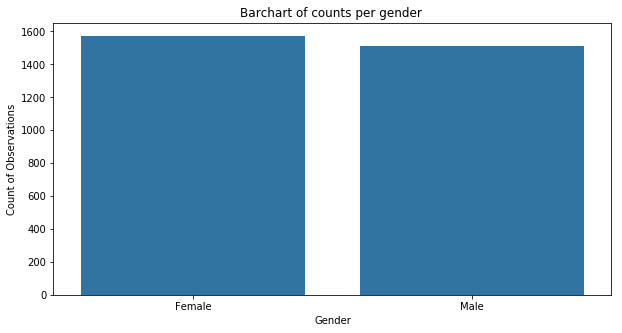

In [4]:
##gender distribution in the observations 
#plot 1
plt.figure(figsize=(10,5))

color=sb.color_palette()[0]

sb.countplot(data=pisa_new, x='sex', color=color);
plt.title('Barchart of counts per gender ')
plt.xlabel('Gender')
plt.ylabel('Count of Observations');


In [6]:
pisa_new['sex'].value_counts()

Female    1573
Male      1510
Name: sex, dtype: int64

### Observation

From the above bar chart, we can see that the respondents belong to two genders, Male and Female.

The majority of respondents were female. There is a slight difference of 63 observations between the male and female respondents. 

## Question 2: What is the distribution of the respondent's family structure?


In [5]:
#find unique values in the family structure column
pisa_new['family_structure'].unique()

pisa_new['family_structure']=pisa_new['family_structure'].replace(1.0, 'Single Parent Family')
pisa_new['family_structure']=pisa_new['family_structure'].replace(2.0, 'Nuclear Family')
pisa_new['family_structure']=pisa_new['family_structure'].replace(3.0, 'Mixed Family')
pisa_new['family_structure']=pisa_new['family_structure'].replace('na', 'null')


family_dict=['Single Parent Family','Nuclear Family', 'Mixed Family', 'null']

family_variable=pd.api.types.CategoricalDtype(ordered=True, categories=family_dict)


In [8]:
#plot a pie chart to show the proportions of family structure
pisa_new['family_structure'].unique()

array(['Nuclear Family', nan, 'Mixed Family', 'Single Parent Family'], dtype=object)

In [9]:
pisa_new['family_structure'].value_counts()

Nuclear Family          2295
Single Parent Family     147
Mixed Family              94
Name: family_structure, dtype: int64

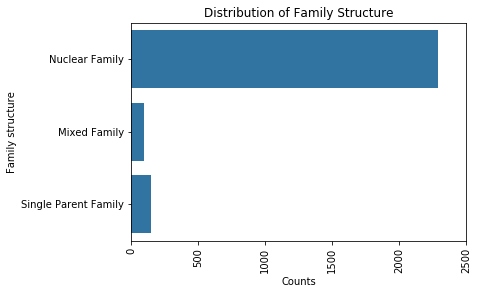

In [6]:
#countplot of  family structure
#plot 2

color=sb.color_palette()[0]

sb.countplot(data=pisa_new, y='family_structure', color=color);

plt.xticks(rotation=90)
plt.xlim(0, 2500)

plt.title('Distribution of Family Structure')
plt.ylabel('Family structure')
plt.xlabel('Counts');


## Observations

There are three distinct family structures: Nuclear family, Single Parent Family, Mixed family

The majority of the respondents are from a nuclear family setting (2295 respondents)

The least number of respondent come from a mixed family setting (49 respondents) which accounts to 0.04 of the answered questions.


## Question 3: What are the Parent's educational level?

In [12]:
#Check for father's occupation unique values
pisa_new['father_level'].unique()

array(['ISCED 3A, ISCED 4', 'ISCED 5A, 6', 'ISCED 2', 'None', 'ISCED 5B',
       'ISCED 3B, C', 'ISCED 1', nan], dtype=object)

In [79]:
# Check for mother's occupation unique values
pisa_new['mother_level'].unique()

array(['ISCED 3A, ISCED 4', 'ISCED 5A, 6', 'ISCED 3B, C', 'None',
       'ISCED 2', 'ISCED 1', 'ISCED 5B', nan], dtype=object)

In [80]:
#Compare the values in the father and mother education level
pisa_new['father_level'].value_counts()

ISCED 3A, ISCED 4    1206
ISCED 2               650
ISCED 5A, 6           496
None                  315
ISCED 5B              224
ISCED 3B, C           140
ISCED 1                51
Name: father_level, dtype: int64

In [82]:
pisa_new['mother_level'].value_counts()

ISCED 3A, ISCED 4    1309
ISCED 2               805
ISCED 5A, 6           475
None                  283
ISCED 3B, C            94
ISCED 5B               73
ISCED 1                43
Name: mother_level, dtype: int64

In [7]:
#change the education level types into categories
edu_classes=['ISCED 1','ISCED 2','ISCED 3B, C', 'ISCED 3A, ISCED 4','ISCED 5A, 6','ISCED 5B']

e_classes=pd.api.types.CategoricalDtype(ordered=True, categories=edu_classes)
s_vars=['father_level', 'mother_level']

for i in range(len(s_vars)):
    pisa_new[s_vars[i]]=pisa_new[s_vars[i]].astype(e_classes)

In [14]:
pisa_new['father_level'].unique()

[ISCED 3A, ISCED 4, ISCED 5A, 6, ISCED 2, NaN, ISCED 5B, ISCED 3B, C, ISCED 1]
Categories (6, object): [ISCED 1 < ISCED 2 < ISCED 3B, C < ISCED 3A, ISCED 4 < ISCED 5A, 6 < ISCED 5B]

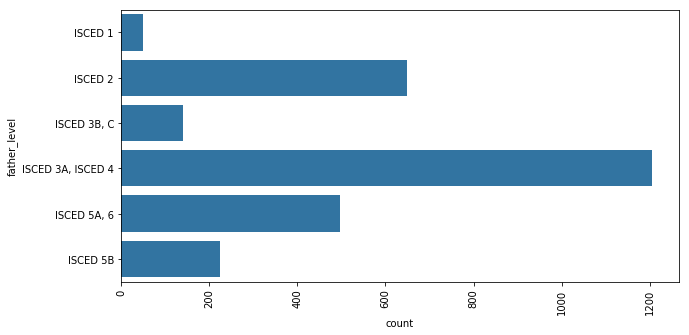

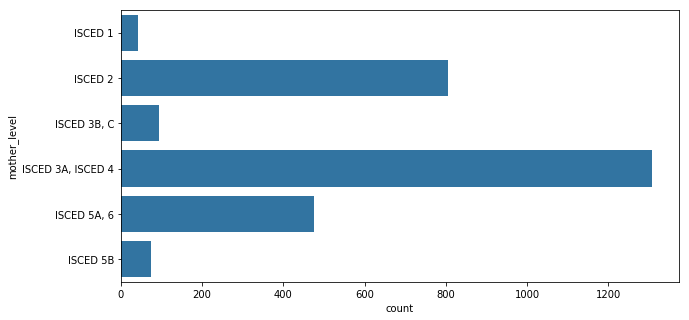

In [8]:
#plot the countplot of parent's education levels
#plot 3

plt.figure(figsize=(10,5))

color=sb.color_palette()[0]
sb.countplot(data=pisa_new, y='father_level',color=color)
plt.xticks(rotation=90);

#plot 4
plt.figure(figsize=(10,5))
color=sb.color_palette()[0]
sb.countplot(data=pisa_new, y='mother_level', color=color);

## Observations

The most popular category of education for both parents is ISCED 3A, ISCED 4 followed by ISCED 2.

A high proportion of mothers have taken the ISCED 3A, ISCED 4 category of education than the fathers (1309 vs 1206)

The lowest level of education for both parents is ISCED 1.

A high proportion of fathers have completed the ISCED category than mothers (496 vs 475)


## Question 4: What is the immigration status of the respondents

In [18]:
pisa_new['immigration_status'].value_counts()

Native               2798
Second-Generation       5
First-Generation        4
Name: immigration_status, dtype: int64

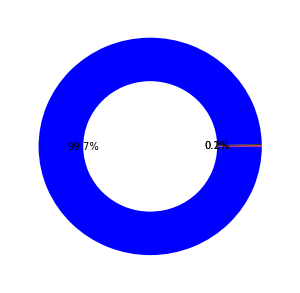

In [9]:
##plot 5
plt.figure(figsize=(5,5))
status=pisa_new['immigration_status'].value_counts()
colors= 'blue','black','red'

plt.pie(status, counterclock=False, wedgeprops={'width':0.4}, autopct='%1.1f%%', colors=colors );

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Observations

The highest proportion of respondents are natives 

the proportion of respondents who are first and secondary generation are negligible.

## Question 5: What is the distribution of ages in the first grade

In [255]:
pisa_new['age_first_grade'].describe()

count    2949.000000
mean        6.416751
std         0.722955
min         4.000000
25%         6.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: age_first_grade, dtype: float64

In [20]:
pisa_new['age_first_grade'].value_counts()

6.0     1821
7.0      953
9.0       97
5.0       54
8.0       19
4.0        4
15.0       1
Name: age_first_grade, dtype: int64

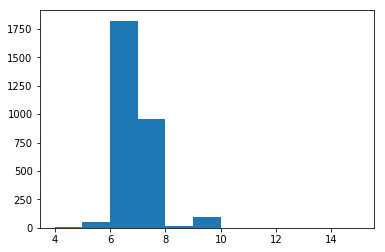

In [10]:
## plot 6

bin_edges=np.arange(4, pisa_new['age_first_grade'].max()+1, 1)


plt.hist(data=pisa_new, x='age_first_grade', bins=bin_edges, range=(0,20));

## Observations

-The majority of students in the first grade were at the age  of 6 years 

-The second largest age group in the first grade were 7 years

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the exploratory stage, there were no unusual points of interest in the variables that were explored.

> There were no transformations done during this step of analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Change the values in family structure column to make it easier for the users to interpret. Single Parent Family','Nuclear Family', 'Mixed Family

>Change them to categorical data types to make it easier to analyse and create a bar chart

>change the mother's education level to categorical data to make it easier o visualize bar charts

>change the father's education level to categorical data to make it easier o visualize bar charts


## Bivariate Exploration

> In this section, i investigated the relationships between 
1. maths scores and gender, 
2. immigration status and total score, 
3. age of first grade to the total score
4. reading, science and maths score and total test scores 
5. age of the genders and age at first grade

# Question 1:What is the relationship between the maths score and gender

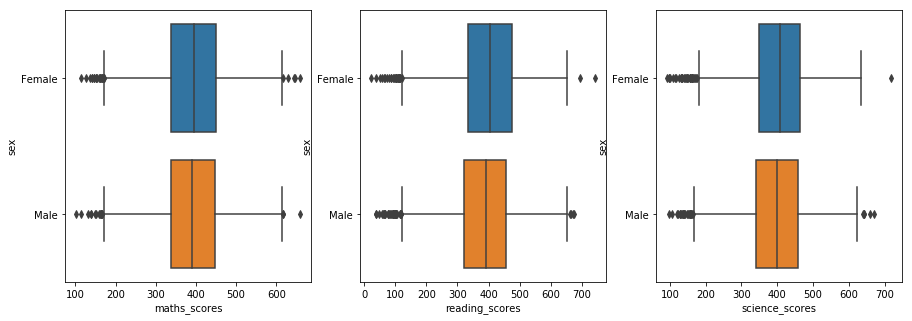

In [11]:
##Plot 1
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sb.boxplot(data=pisa_new,x='maths_scores', y='sex');

plt.subplot(1,3,2)
sb.boxplot(data=pisa_new,x='reading_scores', y='sex');

plt.subplot(1,3,3)
sb.boxplot(data=pisa_new, x='science_scores', y='sex');

## Observations

The female median maths, reading and science scores are higher than the male respondents'




## Question 2: What is the relationship between immigration status and total score

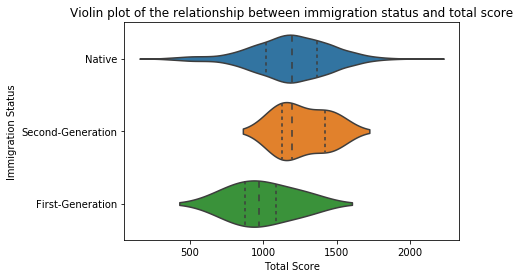

In [12]:
#plot 2
# plot a violin plot to show relationship between immigration status and total score
sb.violinplot(data=pisa_new, x='total_score', y='immigration_status', inner='quartile');
plt.xlabel('Total Score')
plt.ylabel('Immigration Status')
plt.title('Violin plot of the relationship between immigration status and total score');

## Observations

The median total score for first generation immigrants is lower than the natives and second generation immigrants

## Question 3: What is the relationship between age of first grade to the total score

In [ ]:
#plot3

#Plot the scatterplot of the relationship between respondents age at first grade and total score 

plt.scatter(data=pisa_new, x='age_first_grade', y='total_score', alpha=1/20);
plt.xlabel('Age at first grade')
plt.ylabel('Total score')
plt.title('Scatter plot of the relationship between age at first grade and total score');

## Observations

There is no linear correlation between the age at first grade and the total score at the end of the program

## Question 4: What is the relationship between the scores to the total score

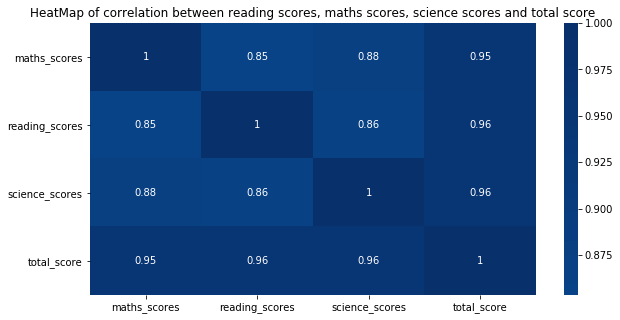

In [13]:
#plot 4

#Plotting a heatmap to show the relationship between the reading, science and maths scores and the total score

plt.figure(figsize=(10,5))
scores=['maths_scores', 'reading_scores','science_scores','total_score']

sb.heatmap(pisa_new[scores].corr(),
           annot=True, cmap='Blues', center=0);
plt.title('HeatMap of correlation between reading scores, maths scores, science scores and total score');

## Observations

The maths scores, reading scores and science scores are highly correlated to the total scores.

The maths scores are more highly correlated to the science scores (0.88) than reading scores(0.85)


## Question 5: What is the the relationship between the age of the genders and age at first grade


In [26]:
repeats=['repeat_grades1_to_6', 'repeat_grades7_to_9', 'repeat_grades10_to_12']

family_variable=pd.api.types.CategoricalDtype(ordered=True, categories=repeats)


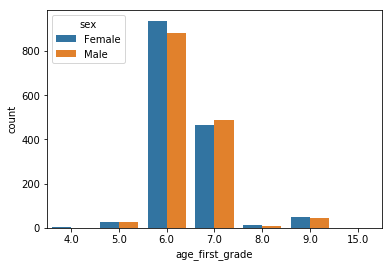

In [14]:
sb.countplot(data=pisa_new, x='age_first_grade', hue='sex');

### Observations

The majority of the students join the first grade at the age of 6 years

More males students join the first grade at 6 years than female students

More female students enter the first grade at 7 years than male students

The minimum age of entry to the first grade is 4 years

The maximum age of entry to first grade is 15 years


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The most interesting relationship that i noticed was that between the age at first grade and the total scores. I was expecting a greater colinearity between the two variables 

## Multivariate Exploration


The relationships that were explored in this section were:

1. The relationship between the immigration status of the student and their scores in reading and science
2. The relationship between the students family structure and reading and science scores
3. The relationship between the family structure,immigration status and the total score of students?
4. The relationship between the family structure,immigration status, and the reading and science score
5. The relationship between the maths scores, reading scores and science scores compared to the family structure and immigration status

## Question 1: What is the relationship between the immigration status of the student and their scores in reading and science?

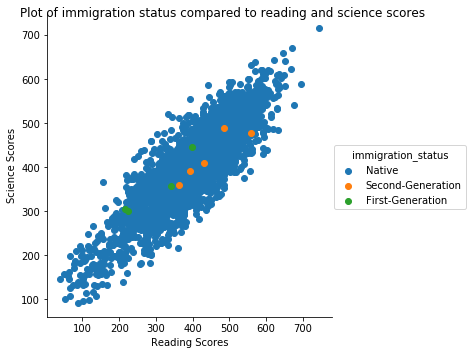

In [15]:
#Plot 1

#Relationship between the immigration status of the student and their scores in reading and science

g = sb.FacetGrid(data = pisa_new, hue = 'immigration_status', size = 5)
g.map(plt.scatter, 'reading_scores', 'science_scores');
g.add_legend()
g.fig.suptitle('Plot of immigration status compared to reading and science scores');
plt.xlabel('Reading Scores')
plt.ylabel('Science Scores');

## Observations 

There is a linear relationsihp between immigration status and reading and science scores 

There is a large number of observations from the native students 

The reading and science scores of second generation and first generation students is between 300 and 600

## Question 2: What is the relationship between the students family structure and reading and science scores?

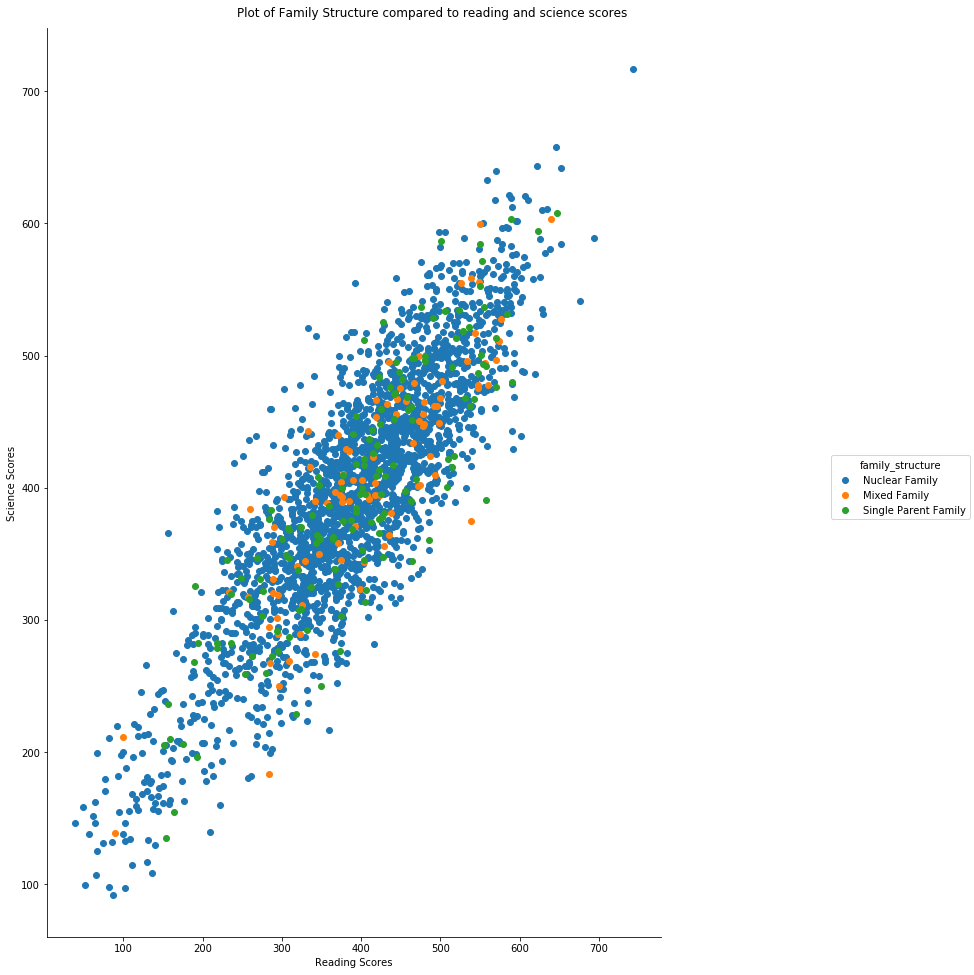

In [16]:
#Plot 2

# The relationship between the total score and reading and science scores

g = sb.FacetGrid(data = pisa_new, hue = 'family_structure', size = 5)
g.map(plt.scatter, 'reading_scores', 'science_scores');
g.add_legend()
g.fig.set_size_inches(15,15)
g.fig.suptitle('Plot of Family Structure compared to reading and science scores');
plt.xlabel('Reading Scores')
plt.ylabel('Science Scores');


## Observations

There is a linear relationship between the family structure and reading and science scores

The students with mixed family structure are densely populated between the scores of 300 and 600

The students with single parent families are densely populated between the scores od 200 and 600

The families from nuclear families atre densely populated in the scores greater than  600

## Question 3: What is the relationship between the family structure,immigration status and the total score of students?


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


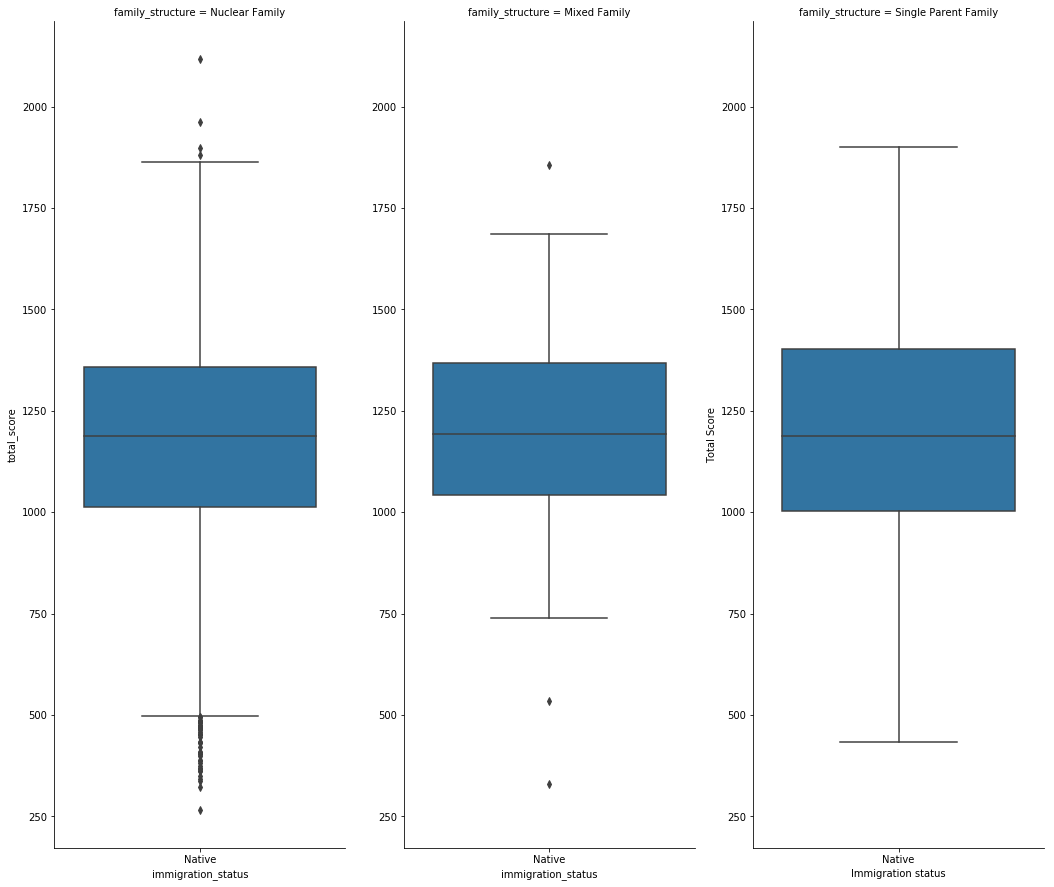

In [17]:
#Plot 3 

#Relationship between family structure, immigration status and total student scores 
g = sb.FacetGrid(data = pisa_new, col = 'family_structure', size = 4)
g.map(sb.boxplot, 'immigration_status','total_score');
g.fig.set_size_inches(15,15)

plt.xlabel('Immigration status')
plt.ylabel('Total Score');


## Observations

The median total scores per family structure and immigration status are nearly identical

The total scores of students from nuclear families and native immigration status have a large number of outliers in the lower than the lower interquartile range

The single parent family structure with native immigration statuses have no outliers, most probably because there is only a small amount of observations in this category

## Question 4: What is the relationship between the family structure,immigration status, and the reading and science score

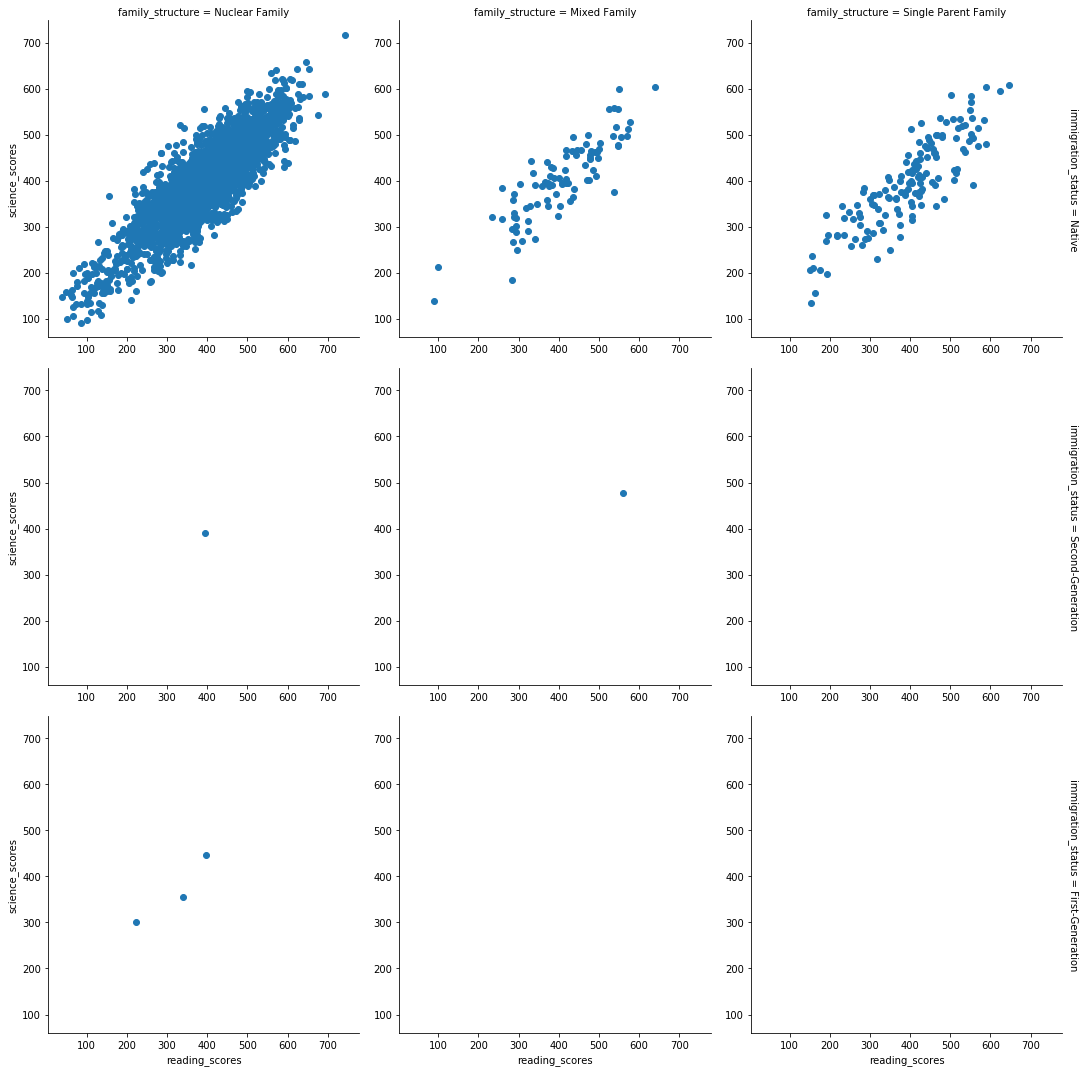

In [18]:
g = sb.FacetGrid(data = pisa_new, col = 'family_structure', row = 'immigration_status', size = 5,
                margin_titles = True)

g.map(plt.scatter, 'reading_scores', 'science_scores');


## Observations

There is a linear relationship between science scores and reading scores in the nuclear, mixed and single family structures of native parents

There no test score values in the first generation and second generation of single parent households 

There are no test score values in the mixed family structures of first generation immigration status households

## Question 5: What is the relationship between the maths scores, reading scores and science scores compared to the family structure and immigration status


In [ ]:
#Plot 5

g = sb.PairGrid(data = pisa_new, x_vars = ['maths_scores', 'reading_scores', 'science_scores'],
               y_vars=['family_structure','immigration_status'])

g.map(sb.violinplot, inner = 'quartile');

g.fig.set_size_inches(15,15)


## Observations

The maths scores of the nuclear and single parent house have the same median of around 400. 

The mixed parent house has a slightlu higher median than the other family structures 

The median reading scores of the mixed family structure are slightly  higher than those of other family structures 

The science scores of the single parent households are lower than other family structures 

The maths scores of first generation immigrants are lower than other immigration statuses

The reading scores of first generation immigrants are considerably lower than other immigration statuses

The science scores of first generation immigrants are considerably lower than other immigrants






### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The last pairplot showed an interesting relationship between immigration status and the test scores.

### Were there any interesting or surprising interactions between features?

> It seems the first generation immigrants are lagging behind the second generation immigrants and natives. There would be need for additional resources to help them adapt and settle into the classes for better performance.


## Conclusions
> The median total scores per family structure and immigration status are nearly identical

> The first generation immigrants are lagging behind second generation and native students

> The families from nuclear families atre densely populated in the scores greater than 600

> The reading and science scores of second generation and first generation students is between 300 and 600

> There is a large number of observations from the native students. The majority of the observations was from native students

